In [7]:
from glob import glob
import pickle

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
file_list_S = glob('data2/model_S*')
file_list_M = glob('data2/model_M*')
file_list_L = glob('data2/model_L*')
file_list_XL = glob('data2/model_XL*')

In [4]:
file_list = glob('data2/*')

In [5]:
all_data_dicts = {
    'S':[],
    'M':[],
    'L':[],
    'X':[]
}

for filename in file_list:
    with open(filename, 'rb') as handle:
        this_dict = pickle.load(handle)
        all_data_dicts[filename[12]].append(this_dict)




In [6]:
all_data_dicts

{'S': [{'sig_ratio': 0.2,
   'dimension': 14,
   'result': [[14, 0], [14, 0], [14, 0], [14, 0]]},
  {'sig_ratio': 0.15,
   'dimension': 16,
   'result': [[16, 0], [16, 0], [16, 0], [16, 0]]},
  {'sig_ratio': 0.05,
   'dimension': 2,
   'result': [[2, 1], [2, 0], [2, 2], [2, 0]]},
  {'sig_ratio': 0.02,
   'dimension': 9,
   'result': [[9, 17], [9, 0], [9, 0], [9, 0]]},
  {'sig_ratio': 0.15,
   'dimension': 11,
   'result': [[11, 0], [11, 0], [11, 0], [11, 0]]},
  {'sig_ratio': 0.1,
   'dimension': 13,
   'result': [[13, 3], [13, 0], [13, 0], [13, 0]]},
  {'sig_ratio': 0.15,
   'dimension': 21,
   'result': [[21, 1], [21, 0], [21, 0], [21, 0]]},
  {'sig_ratio': 0.15,
   'dimension': 5,
   'result': [[5, 0], [5, 0], [5, 0], [5, 0]]},
  {'sig_ratio': 0.02,
   'dimension': 10,
   'result': [[10, -1], [10, -1], [10, -1], [10, -1]]},
  {'sig_ratio': 0.05,
   'dimension': 11,
   'result': [[11, -1], [11, 2], [11, 0], [11, 0]]},
  {'sig_ratio': 0.15,
   'dimension': 17,
   'result': [[17, 1], [

In [8]:
numbers_S = {}
for event in all_data_dicts['S']:
    sig_ratio, dim = event['sig_ratio'], event['dimension']
    if sig_ratio in numbers_S:
        numbers_S[sig_ratio] = max(numbers_S[sig_ratio], dim)
    else:
        numbers_S[sig_ratio] = dim

In [9]:
numbers_S

{0.2: 42, 0.15: 38, 0.05: 17, 0.02: 10, 0.1: 14, 0.001: 2, 0.01: 2, 0.005: 2}

In [10]:
numbers_M = {}
for event in all_data_dicts['M']:
    sig_ratio, dim = event['sig_ratio'], event['dimension']
    if sig_ratio in numbers_M:
        numbers_M[sig_ratio] = max(numbers_M[sig_ratio], dim)
    else:
        numbers_M[sig_ratio] = dim

In [11]:
numbers_L = {}
for event in all_data_dicts['L']:
    sig_ratio, dim = event['sig_ratio'], event['dimension']
    if sig_ratio in numbers_L:
        numbers_L[sig_ratio] = max(numbers_L[sig_ratio], dim)
    else:
        numbers_L[sig_ratio] = dim

In [12]:
numbers_XL = {}
for event in all_data_dicts['X']:
    sig_ratio, dim = event['sig_ratio'], event['dimension']
    if sig_ratio in numbers_XL:
        numbers_XL[sig_ratio] = max(numbers_XL[sig_ratio], dim)
    else:
        numbers_XL[sig_ratio] = dim

In [14]:
def sort_dict(d):
    return dict(sorted(d.items()))

In [15]:
numbers_S = sort_dict(numbers_S)
numbers_M = sort_dict(numbers_M)
numbers_L = sort_dict(numbers_L)
numbers_XL = sort_dict(numbers_XL)

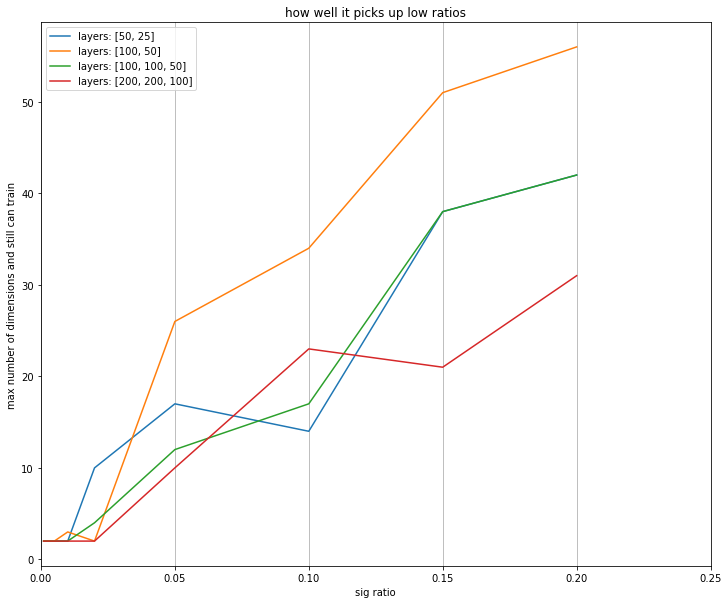

In [17]:
    
fig, ax = plt.subplots(figsize = (12,10))

ax.plot(numbers_S.keys(), numbers_S.values(),label = 'layers: [50, 25]')
ax.plot(numbers_M.keys(), numbers_M.values(),label = 'layers: [100, 50]')
ax.plot(numbers_L.keys(), numbers_L.values(),label = 'layers: [100, 100, 50]')

ax.plot(numbers_XL.keys(), numbers_XL.values(),label = 'layers: [200, 200, 100]')


ax.legend()

ax.set_title('how well it picks up low ratios')
ax.set_xlabel('sig ratio')

ax.set_ylabel('max number of dimensions and still can train')
ax.set_xlim((0,0.25))
# ax.set_ylim((-1, 20))
ax.grid(axis="x", which = 'both')

plt.show()